<a href="https://colab.research.google.com/github/namangarg1805/Data-Analytics/blob/main/healthyfy_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# Downloading dataset
!wget "https://drive.google.com/uc?export=download&id=1GVhrh2rH6hUunV4Tf7lQoSFsqov9aPjU" -O healthyfime.csv

--2025-01-14 20:51:10--  https://drive.google.com/uc?export=download&id=1GVhrh2rH6hUunV4Tf7lQoSFsqov9aPjU
Resolving drive.google.com (drive.google.com)... 142.251.2.139, 142.251.2.100, 142.251.2.113, ...
Connecting to drive.google.com (drive.google.com)|142.251.2.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1GVhrh2rH6hUunV4Tf7lQoSFsqov9aPjU&export=download [following]
--2025-01-14 20:51:10--  https://drive.usercontent.google.com/download?id=1GVhrh2rH6hUunV4Tf7lQoSFsqov9aPjU&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.101.132, 2607:f8b0:4023:c06::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.101.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 761835 (744K) [application/octet-stream]
Saving to: ‘healthyfime.csv’

healthyfime.csv     100%[===================>] 743.98K  --.-KB/s  

In [2]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [8]:
df = pd.read_csv("healthyfime.csv")
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [9]:
df.sample(5)

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
1866,35.0,M,180.1,98.3,30.3,85.0,146.0,45.3,7.1,54.0,184.0,D
2887,26.0,M,169.6,78.3,24.2,79.0,126.0,47.3,10.3,45.0,217.0,B
9778,24.0,M,173.7,67.4,14.7,81.0,140.0,51.8,20.7,64.0,244.0,A
4034,21.0,F,159.9,53.5,27.9,62.0,103.0,24.2,18.7,36.0,154.0,B
3328,23.0,F,164.0,60.3,23.2,60.0,105.0,32.0,26.0,51.0,205.0,A


In [12]:
df.shape

(13393, 12)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


**Insight 1**:
1. No null values in dataset
2. Object columns(2) - gender, class
3. No of Rows/Data - 13393,
4. No of Features - 12
5. Target Feature - Class

In [16]:
# Doing label encoding on Gender and Class
gender_arr = df['gender'].unique() #Checking if only 2 values are there and or there is need to do string formatting
df['gender']=df['gender'].map({'M':0,'F':1})
classes_arr = df['class'].unique()
df['class'] = df['class'].map({'D':0,'C':1,'B':2,'A':3})


In [20]:
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,1
1,25.0,0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,3
2,31.0,0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,1
3,32.0,0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,2
4,28.0,0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,2


<Axes: >

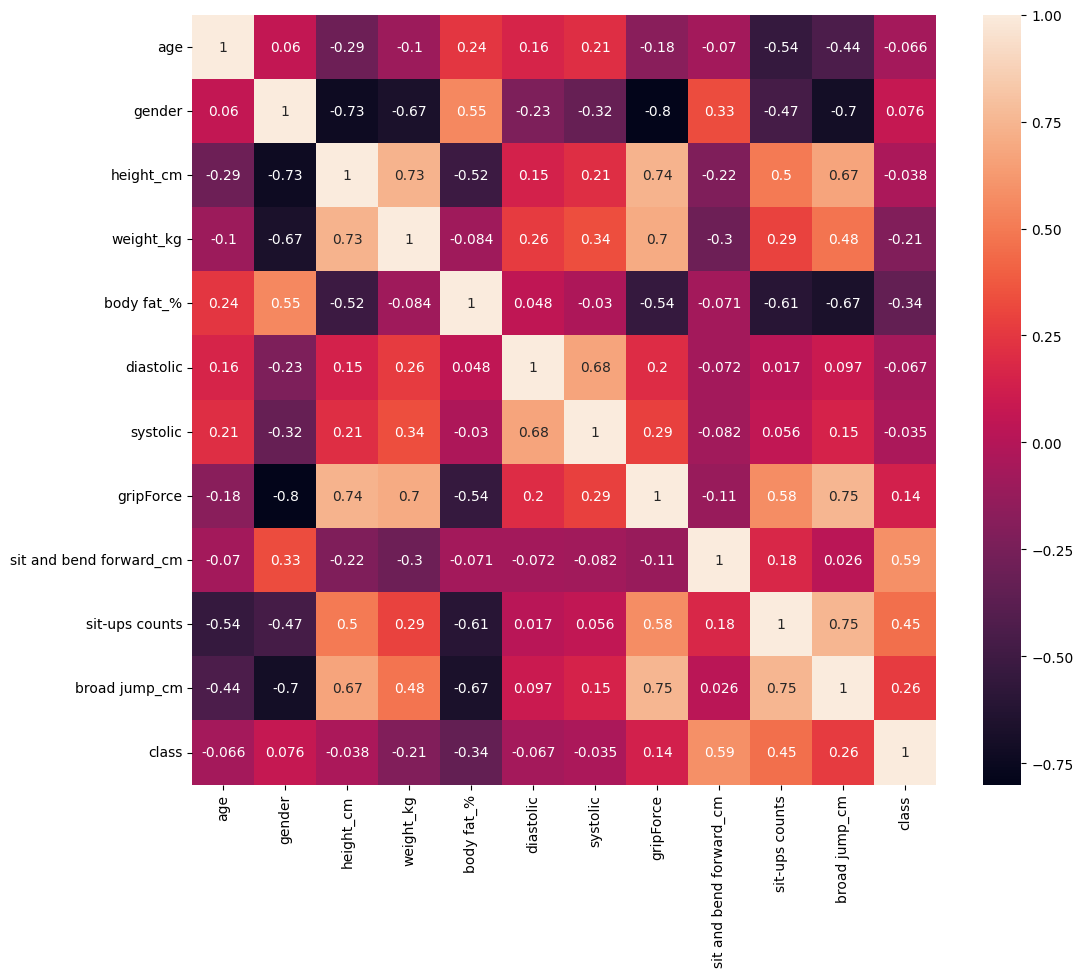

In [30]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)

**Insight 2:**
1. There is positive correlation between height and weight which is expected.
2. There is positive correlation between systoic and diastolic which is expected.
3. Broad jump is also positively correlated with sit_up and grip force.
4. grip force is also positively correlated with height.

<Axes: >

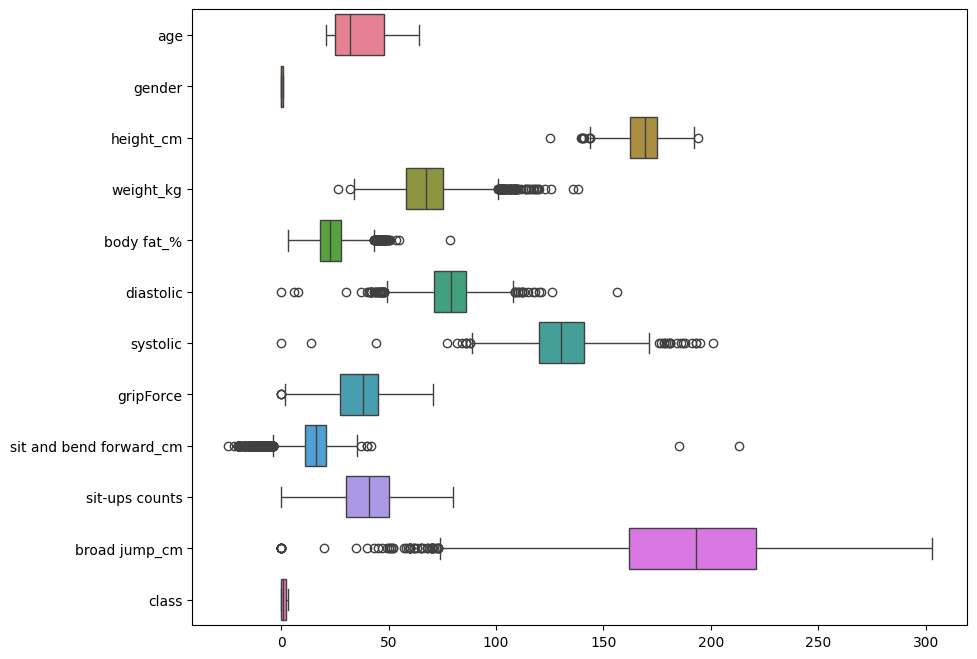

In [34]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df,orient ='h')

**Insight:**
1. Distribution is different for each feature, we need to standardize it for machine learning

In [41]:
# Splitting data
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X.shape,y.shape

((13393, 11), (13393,))

In [42]:
X.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
0,27.0,0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0
1,25.0,0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0
2,31.0,0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0
3,32.0,0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0
4,28.0,0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0


In [43]:
y.head()

,class
0,1
1,3
2,1
3,2
4,2


In [44]:
y.sample()

,class
10479,2
